# Modelos de regresión

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook realiza una experimentación para obtener el mejor modelo de regresión para predecir el precio de un vehículo.

Para evaluar el modelo de regresión se utilizan 3 métricas:

+ MAE
+ MSLE
+ $R^2$ (coeficiente de determinación)


---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- pandas (2.2.2)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn-pandas (2.2.0)

# Contexto de Negocio
Una empresa del sector automotriz está interesada en desarrollar un modelo predictivo que permita estimar el precio de los automóviles en función de diversas características técnicas y de diseño. Este modelo será clave para que la empresa pueda:

+ Ofrecer recomendaciones de precios competitivos para nuevos modelos de automóviles.
+ Ajustar los precios de modelos ya existentes basándose en las características y especificaciones.
+ Entender cómo cada factor técnico (como el tamaño del motor, la potencia, y el consumo de combustible) afecta el precio de los automóviles.


# Objetivo del proyecto
Construir un modelo de regresión capaz de predecir el precio de un automóvil, basándose en las características disponibles



# Aporte del modelo

El modelo podría ser usado por el departamento de ventas y marketing para fijar precios competitivos y también ayudar a los clientes a encontrar el automóvil que mejor se ajuste a sus necesidades en función de su presupuesto.

Este tipo de análisis también podría ser útil para evaluar el impacto de características específicas en el precio, como el tipo de combustible, el tamaño del motor o el número de puertas, lo que puede guiar futuras decisiones en el diseño de vehículos.

In [1]:
# Importa las librerías a nuestro entorno de trabajo
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

In [14]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/main/data/CarPrice_Assignment.csv

--2024-10-01 23:26:08--  https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/main/data/CarPrice_Assignment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘CarPrice_Assignment.csv’

CarPrice_Assignment 100%[===================>]  26.09K  --.-KB/s    in 0.002s  

2024-10-01 23:26:08 (10.4 MB/s) - ‘CarPrice_Assignment.csv’ saved [26717/26717]



In [15]:
data = pd.read_csv("CarPrice_Assignment.csv", sep=",")

In [18]:
data.shape

(205, 26)

In [5]:
# Información de tipo de datos y nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [33]:
# Obtiene la correlación de las variables con el precio del vehículo (la variable que se pretende predecir)
corr_matrix = data[data.describe().columns].corr()
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


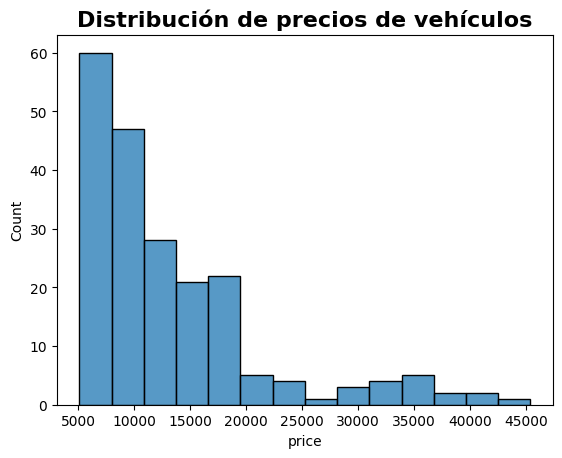

In [17]:
sb.histplot(data.price)
plt.title("Distribución de precios de vehículos", fontsize=16, fontweight="bold")
plt.show()

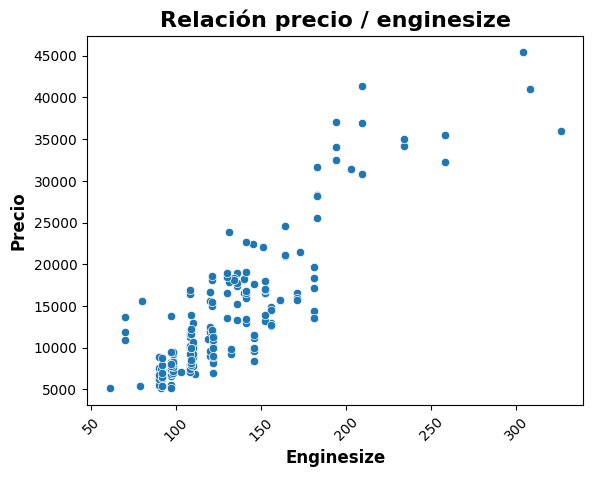

In [20]:
sb.scatterplot(x=data.enginesize , y=data.price)
plt.title("Relación precio / Enginesize", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)  # Rotar las etiquetas 45 grados
plt.xlabel("Enginesize", fontsize=12, fontweight="bold")
plt.ylabel("Precio", fontsize=12, fontweight="bold")
plt.show()

El engine size (tamaño del motor) de un vehículo se refiere al volumen total de los cilindros del motor, es decir, el espacio donde ocurre la combustión de la mezcla de aire y combustible para generar energía. Este tamaño se mide generalmente en litros (L) o en centímetros cúbicos (cc).

In [110]:
pd.DataFrame(data['enginesize'].describe()).T

,count,mean,std,min,25%,50%,75%,max
enginesize,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0


Además de los litros (L), otra unidad común para medir el tamaño de un motor es el centímetro cúbico (cc) o pulgada cúbica (ci).

+ Centímetros cúbicos (cc): Es la medida más pequeña y se refiere al volumen total de los cilindros del motor en centímetros cúbicos. Por ejemplo, un motor de 1000 cc es equivalente a 1 litro.
+ Pulgadas cúbicas (ci): Esta es una unidad de medida más antigua y se utilizaba comúnmente en vehículos estadounidenses hasta que se adoptó el sistema métrico.
En este caso, si el valor máximo de engine size es 326 y la mediana es 120, es muy probable que estos números estén en centímetros cúbicos (cc). Un valor de 326 cc sería un motor pequeño, típico de motocicletas, scooters, o algunos vehículos compactos muy eficientes.

**Análisis de 'curbweight' y 'horsepower'**

En un vehículo, "curb weight" y "horsepower" son dos métricas importantes que se utilizan para describir su masa y potencia respectivamente:

1. Curb Weight (Peso en vacío):

Definición: El curb weight o peso en vacío es el peso total del vehículo cuando está vacío de pasajeros y carga, pero con todos los fluidos necesarios (combustible, aceite, refrigerante, entre otros) llenos y todos los accesorios estándar instalados.

Unidades de medida:
Generalmente, se mide en kilogramos (kg) o libras (lbs).

Importancia: Un vehículo con un peso en vacío menor generalmente será más eficiente en términos de consumo de combustible y tendrá mejor aceleración. Sin embargo, un peso mayor puede proporcionar más estabilidad y confort en carretera.

2. Horsepower (Caballos de fuerza):

Definición: El horsepower (HP) es una medida de la potencia del motor de un vehículo, que indica cuánta fuerza puede generar el motor para mover el vehículo. Representa la tasa a la que se puede hacer trabajo. Un mayor número de caballos de fuerza generalmente se traduce en una mayor velocidad máxima y una mejor aceleración.

Unidades de medida:

En países que usan el sistema métrico, se utiliza kilovatios (kW) como unidad de medida equivalente, donde 1 HP ≈ 0.7355 kW.
Caballos de fuerza (HP) es la medida más común en automóviles.

Importancia: El horsepower es crucial para entender el rendimiento del vehículo. Un vehículo con más caballos de fuerza será más rápido y tendrá mejor capacidad para arrastrar o llevar carga pesada.
Por lo tanto, el "curb weight" afecta el manejo, la eficiencia de combustible y la dinámica del vehículo, mientras que el "horsepower" determina su potencia, aceleración y rendimiento en carretera.

In [117]:
pd.DataFrame(data[['curbweight', 'horsepower']].describe()).T

,count,mean,std,min,25%,50%,75%,max
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0


# Fase 4 - Modelamiento

In [75]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=29),
    'Random Forest': RandomForestRegressor(random_state=29),
    'Random Forest II': RandomForestRegressor(max_depth=5,random_state=29),
    'Random Forest III': RandomForestRegressor(min_samples_leaf=4,random_state=29),
}

## Modelo base

In [99]:
# Divide en conjunto de características (X) y variable objetivo (y)
X = pd.DataFrame(data['enginesize'])
y = data['price']  # La variable objetivo

# Divide en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [101]:
print(f"{'Shape del set de entrenamiento':<30}:", X_train.shape)
print(f"{'Shape del set de prueba':<30}:", X_test.shape)

Shape del set de entrenamiento: (164, 1)
Shape del set de prueba       : (41, 1)


In [102]:
# Diccionario para guardar los modelos entrenados
trained_models = {}
history = {}

for name, model in models.items():
  pipeline = Pipeline(steps=[('model', model)])
  pipeline.fit(X_train, y_train)
  # Guardar el modelo entrenado en el diccionario
  trained_models[name] = pipeline
  y_pred = pipeline.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  msle = mean_squared_log_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  score_train = model.score(X_train, y_train)
  print(f'{name:<20} - MAE: {mae:.2f} - MSLE: {msle:.4f} - R² test: {r2:.4f} - R² train: {score_train:.4f}')
  # Guarda resultados
  history[name] = [model, model.score(X_test, y_test),score_train, mae, msle]

Linear Regression    - MAE: 2685.13 - MSLE: 0.0999 - R² test: 0.6237 - R² train: 0.7800
Decision Tree        - MAE: 2512.52 - MSLE: 0.0673 - R² test: 0.6727 - R² train: 0.9519
Random Forest        - MAE: 2487.73 - MSLE: 0.0657 - R² test: 0.6849 - R² train: 0.9476
Random Forest II     - MAE: 2338.33 - MSLE: 0.0542 - R² test: 0.7350 - R² train: 0.9340
Random Forest III    - MAE: 2387.75 - MSLE: 0.0585 - R² test: 0.7365 - R² train: 0.9053


In [24]:
def visualiza_resultados(history : dict):
  # Extraer los nombres de los modelos y los resultados almacenados en 'history'
  model_names = list(history.keys())
  mae_values = [history[name][3] for name in model_names]  # MAE
  msle_values = [history[name][4] for name in model_names]  # MSLE
  r2_test_values = [history[name][1] for name in model_names]  # R² test
  r2_train_values = [history[name][2] for name in model_names]  # R² train

  # Crear subplots para los gráficos
  fig, axs = plt.subplots(1, 3, figsize=(18, 6))

  # Gráfico de MAE
  axs[0].barh(model_names, mae_values, color='skyblue')
  axs[0].set_title('MAE por Modelo', fontsize=14, fontweight="bold")
  axs[0].set_xlabel('MAE', fontsize=12, fontweight="bold")
  axs[0].invert_yaxis()

  # Gráfico de MSLE
  axs[1].barh(model_names, msle_values, color='#87ceeb')
  axs[1].set_title('MSLE por Modelo', fontsize=14, fontweight="bold")
  axs[1].set_xlabel('MSLE', fontsize=12, fontweight="bold")
  axs[1].invert_yaxis()

  # Gráfico de R² (test y train)
  width = 0.35  # Ancho de las barras
  x = np.arange(len(model_names))

  axs[2].bar(x - width/2, r2_train_values, width, label='R² Train', color='#4682b4')
  axs[2].bar(x + width/2, r2_test_values, width, label='R² Test', color='#5f9ea0')
  axs[2].set_xticks(x)
  axs[2].set_xticklabels(model_names, rotation=45)
  axs[2].set_title('R² por Modelo', fontsize=14, fontweight="bold")
  axs[2].set_ylabel('R² Score', fontsize=12, fontweight="bold")
  axs[2].legend()

  # Agregar el supertítulo
  plt.suptitle('Comparación de Modelos de Regresión', fontsize=18, fontweight="bold")

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()


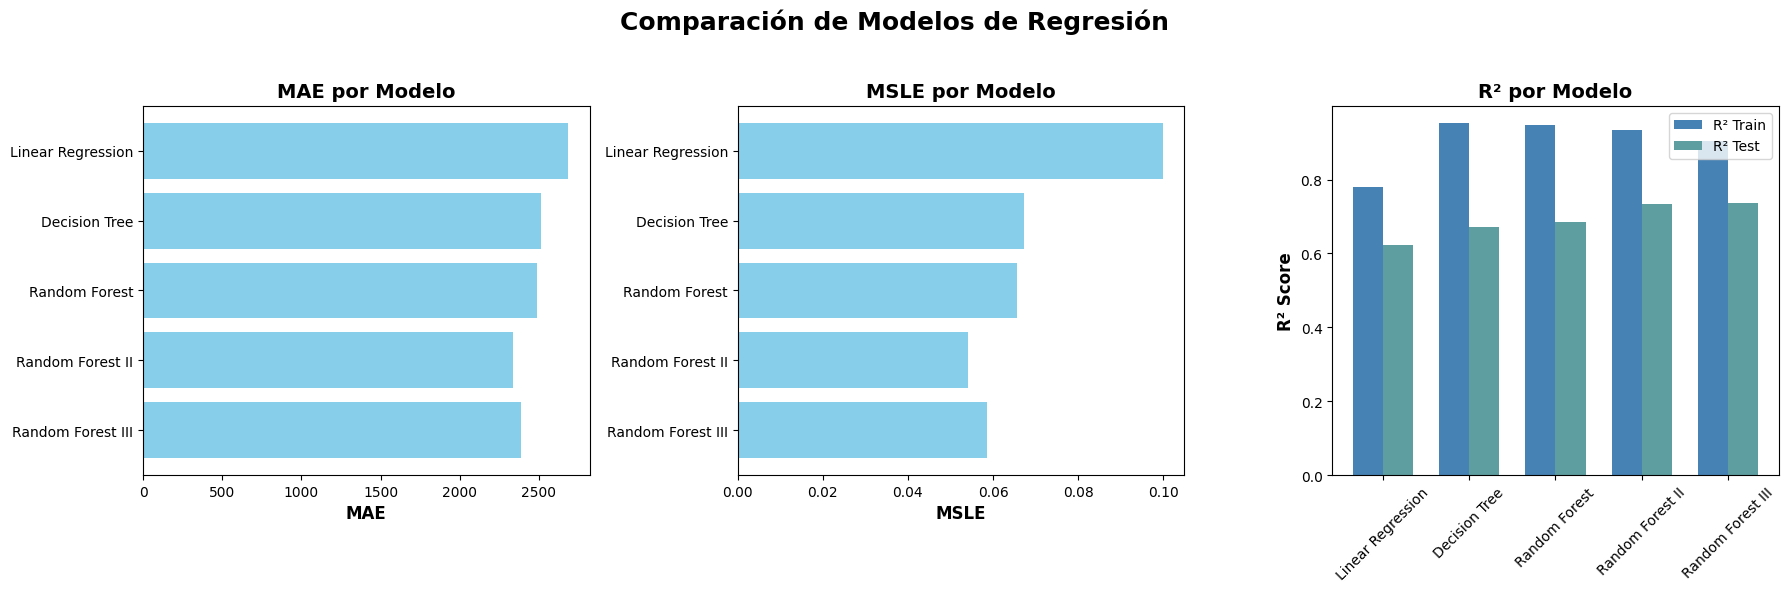

In [79]:
visualiza_resultados(history)

## Variante del modelo

In [57]:
limite = 0.8  # Este valor define el límite correlación

# Filtra las variables que tengan una correlación superior al límite absoluto
correlaciones_altas = corr_matrix["price"].apply(lambda x: abs(x) > limite)

# Muestra las variables que superan el límite de correlación con "price"
seleccionadas = corr_matrix["price"][correlaciones_altas].sort_values(ascending=False).index.tolist()

# Elimina "price" de la lista de variables correlacionadas, ya que no es una característica de entrada
seleccionadas.remove("price")
# Crea un nuevo conjunto de datos solo con las variables correlacionadas y el target "price"
data_correlacion = data[seleccionadas + ['price']]

# Divide en conjunto de características (X) y variable objetivo (y)
X_new = data_correlacion[seleccionadas]  # Las columnas correlacionadas
y_new = data_correlacion['price']  # La variable objetivo

# Divide en conjunto de entrenamiento y prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new,
                                                                    test_size=0.2,
                                                                    random_state=29)
# Verifica los datos
print(f"{'Variables con mayor correlación':<33}:", seleccionadas)
print(f"{'Shape del set de entrenamiento':<33}:", X_train_new.shape)
print(f"{'Shape del set de prueba':<33}:", X_test_new.shape)

Variables con mayor correlación  : ['enginesize', 'curbweight', 'horsepower']
Shape del set de entrenamiento   : (164, 3)
Shape del set de prueba          : (41, 3)


In [66]:
# Diccionario para guardar los modelos entrenados
trained_models_x = {}
history_x = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train_new, y_train_new)
    # Guardar el modelo entrenado en el diccionario
    trained_models_x[name] = pipeline
    y_pred = pipeline.predict(X_test_new)
    mae = mean_absolute_error(y_test_new, y_pred)
    msle = mean_squared_log_error(y_test_new, y_pred)
    r2 = r2_score(y_test_new, y_pred)
    score_train = model.score(X_train_new, y_train_new)
    print(f'{name:<20} - MAE: {mae:.2f} - MSLE: {msle:.4f} - R² test: {r2:.4f} - R² train: {score_train:.4f}')
    # Guarda resultados
    history_x[name] = [model, model.score(X_test_new, y_test_new), score_train, mae, msle]

Linear Regression    - MAE: 2178.92 - MSLE: 0.0504 - R² test: 0.7390 - R² train: 0.8211
Decision Tree        - MAE: 1588.84 - MSLE: 0.0304 - R² test: 0.8335 - R² train: 0.9991
Random Forest        - MAE: 1265.33 - MSLE: 0.0178 - R² test: 0.9115 - R² train: 0.9881
Random Forest II     - MAE: 1457.06 - MSLE: 0.0208 - R² test: 0.8870 - R² train: 0.9664
Random Forest III    - MAE: 1370.44 - MSLE: 0.0197 - R² test: 0.9026 - R² train: 0.9502


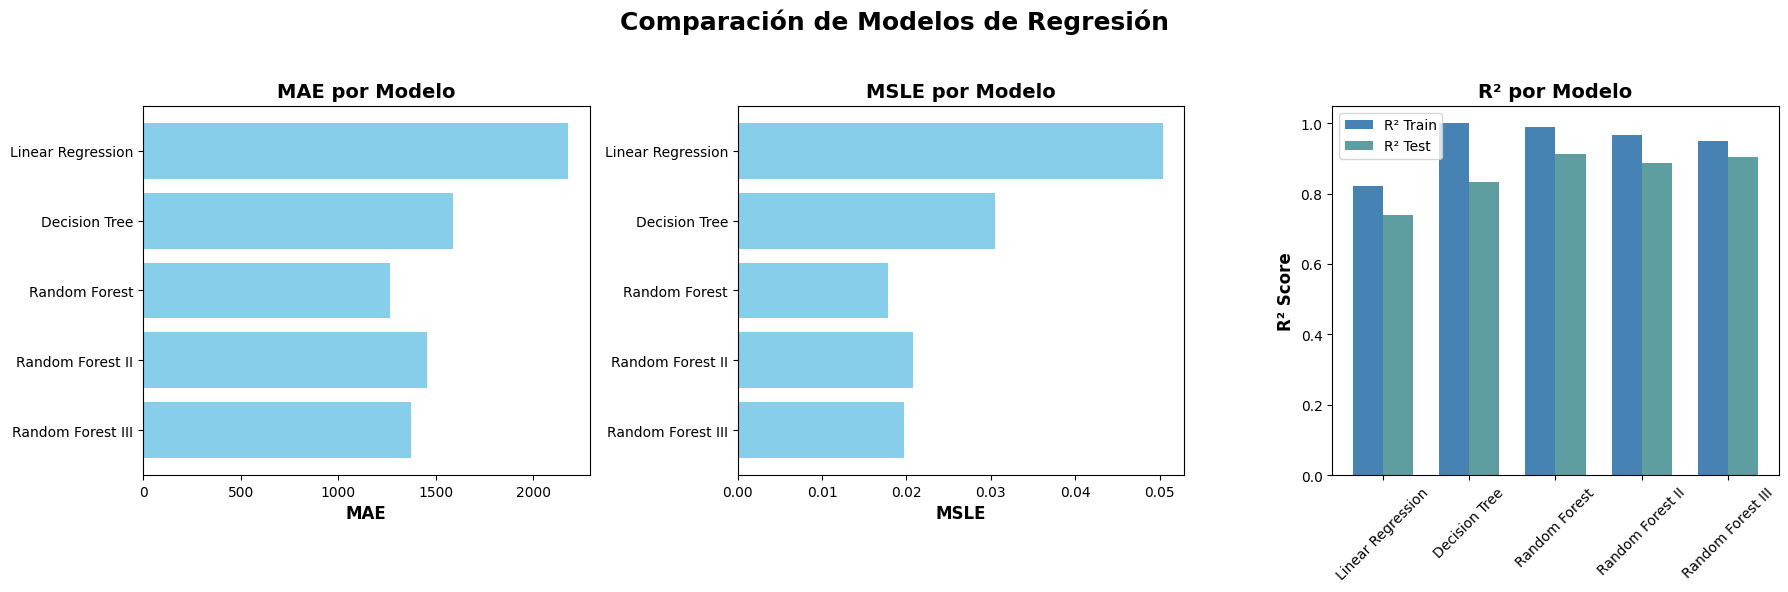

In [67]:
visualiza_resultados(history_x)

# Fase 5 - Evaluación

In [80]:
def get_bestModel(history : dict):
  # Inicializar una variable para almacenar el mayor valor
  mayor_valor = float('-inf')

  # Recorrer el diccionario
  for modelo, data in history.items():
    # Comparar el segundo elemento de la lista (data[1] almacena el score) con el mayor encontrado hasta ahora
    if data[1] > mayor_valor:
        mayor_valor = data[1]
        best = data[0]

  return best, mayor_valor, modelo

## Modelo base

In [103]:
best_model, best_score, name_model = get_bestModel(history)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_score, name_model))

El mejor rendimiento es: 73.65% y le corresponde a Random Forest III


In [98]:
# Obtiene la cantidad de variables independientes con las que fue entrenado el modelo
best_model.n_features_in_

1

In [104]:
# Obtiene el nombre de las variables independientes
best_model.feature_names_in_

array(['enginesize'], dtype=object)

In [111]:
data_new = [120]
data_new

[120]

In [112]:
X_data = pd.DataFrame(np.array(data_new).reshape(1,-1), columns=X_train.columns)

In [113]:
prediction = best_model.predict(X_data)[0]
print("\033[1m El precio del vehículo considerando un motor de tamaño {0} es ${1:.2f}".format(data_new[0],prediction))

 El precio del vehículo considerando un motor de tamaño 120 is $14433.37


## Variante del modelo

In [114]:
best_model_x, best_score_x, name_model_x = get_bestModel(history_x)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_score_x, name_model_x))

El mejor rendimiento es: 91.15% y le corresponde a Random Forest III


In [115]:
# Obtiene el nombre de las variables independientes
best_model_x.feature_names_in_

array(['enginesize', 'curbweight', 'horsepower'], dtype=object)

In [118]:
data_new = [120, 95, 2414]
data_new

[120, 95, 2414]

In [119]:
X_data_new = pd.DataFrame(np.array(data_new).reshape(1,-1), columns=X_train_new.columns)

In [123]:
prediction = best_model_x.predict(X_data_new)[0]
print("\033[1m El precio del vehículo considerando\n\tMotor de tamaño {0}\n\tPeso de {1}\n\t{2} Caballos fuerza es ${3:.2f}".format(data_new[0],
                                                                                                                                    data_new[1], data_new[2], prediction))

 El precio del vehículo considerando
	Motor de tamaño 120
	Peso de 95
	2414 Caballos fuerza es $8226.24


# Desafío

+ Genere versiones de los modelos predictivos de forma que incluyan variables categóricas.

+ Obtenga conclusiones respecto de sobreentrenamiento de los modelos obtenidos.